In [2]:
import yfinance as yf


In [3]:
start_date = '2018-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2018-12-1  End Date: 2024-12-1


In [4]:
ticker = 'AAPL'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131859,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190552,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720150,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232536,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497585,42.400002,42.522499,40.832500,41.250000,248104000
...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


In [5]:
df1=df.reset_index()[('Close', 'AAPL')]

In [6]:
df1

0        46.205002
1        44.172501
2        43.680000
3        42.122501
4        42.400002
           ...    
1503    229.869995
1504    232.869995
1505    235.059998
1506    234.929993
1507    237.330002
Name: (Close, AAPL), Length: 1508, dtype: float64

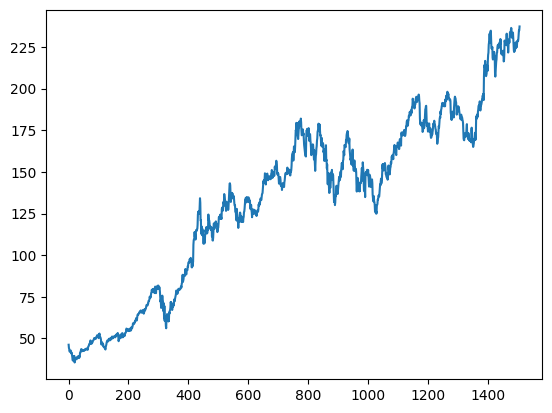

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [ ]:
print(df1)

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

In [ ]:
train_data

In [13]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)